This is a scapbook used to generate graphs and vizulaizations for my paper as well as do some basic calculations

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec

In [ ]:
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_palette("muted")

for c in sns.color_palette("muted"):
    print c

## Baseline

In [69]:
def getEmojiCompare(column, axs):
    rfNo = no[column].tolist()
    rfEm = em[column].tolist()

    idx = list(no.index)*2
    hue = ['emoji']*5 + ['No emoji']*5
    x = pd.DataFrame({'Results':rfEm+rfNo, 'hue':hue}, index=idx)

    ax = sns.barplot(x=x.index, y='Results', data=x, hue='hue', ax=axs)
    
    ax.tick_params(labelsize=10)
    ax.axes.set_title(column + ' evaluation of tweets with and without emojis', fontsize=12)

    ax.set_ylabel('performance', fontsize=12)

    ax.legend().set_title('')
    
    ax.legend(loc='center', bbox_to_anchor=(0.9, 0.5), ncol=1)
    
    plt.savefig('results/baseline/graphs/emoji.png')
    
    return ax

In [7]:
noFile = 'results/baseline/noEmoticon.csv'
emFile = 'results/baseline/emoticon.csv'
no = pd.read_csv(noFile, index_col=0).T
em = pd.read_csv(emFile, index_col=0).T


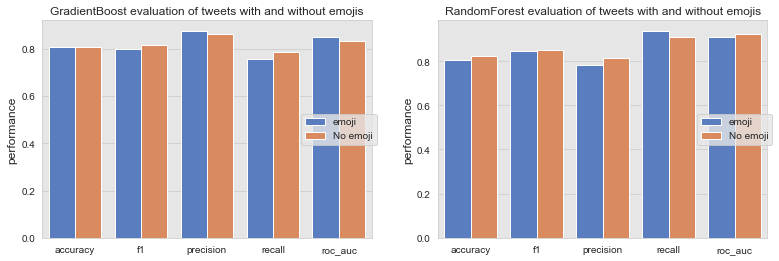

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(13, 4))
plt.subplots_adjust(hspace=0.3)

gbBar = getEmojiCompare('GradientBoost', axs[0])
rfBar = getEmojiCompare('RandomForest', axs[1])

In [338]:
testResults = pd.read_csv('results/baseline/test.csv', index_col=0)

In [18]:
rfSVMResults = testResults.drop(['KNN', 'GradientBoost', 'NaiveBayes', 'KNN'])
rfSVMConfusion = rfSVMResults.drop(['Accuracy', 'Recall', 'Precision', 'Misclassification', 'roc_auc', 'F-Score'], axis=1)

In [26]:
rfCM = rfSVMConfusion.loc['RandomForest']

In [42]:
cm =  [[rfCM.loc['TP'], rfCM.loc['FN']],[rfCM.loc['TN'], rfCM.loc['FP']]]

In [46]:
cm = pd.DataFrame(cm, columns=['Postive', 'Negative'], index=['Postive', 'Negative']).to_numpy()

[Text(0,0.5,''), Text(0,1.5,'business')]

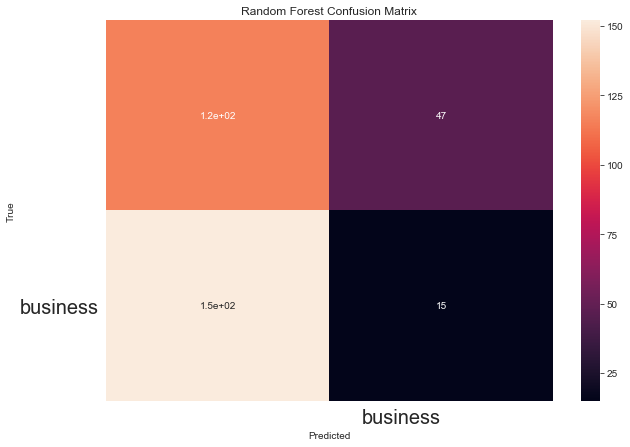

In [61]:
plt.figure(figsize = (10,7))
hm = sns.heatmap(cm, annot=True)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True')
plt.xlabel('Predicted')
labels = ['business', 'health']

plt.title('Random Forest Confusion Matrix')
hm.set_xticklabels([''] + labels)
hm.set_yticklabels([''] + labels)


### Summary

In [143]:
#accSumFile = pd.read_csv('results/neural embeddings/all/Final Table/accuracySummary.csv', index_col=0)
glove = pd.read_csv('results/neural embeddings/all/glove200.csv', index_col=0)
w2v = pd.read_csv('results/neural embeddings/all/w2vfinal.csv', index_col=0)
ft = pd.read_csv('results/neural embeddings/all/ftWSGEmSchiz.csv', index_col=0)
cnn = pd.read_csv('results/neural embeddings/nn/all/cnn/Summary.csv', index_col=0)
baseline = pd.read_csv('results/baseline/test2.csv', index_col=0)
baseline = baseline.drop('NaiveBayes')

In [144]:
baseline

,accuracy,f1,FN,FP,Misclassification,precision,recall,TN,TP,roc_auc
RandomForest,0.812121,0.740741,47,15,0.187879,0.885496,0.711656,152,116,0.810918
GradientBoost,0.793939,0.757196,42,26,0.206061,0.823129,0.742331,141,121,0.793321
SVM,0.830303,0.781841,39,17,0.169697,0.879433,0.760736,150,124,0.829470
KNN,0.542424,0.479798,87,64,0.457576,0.542857,0.466258,103,76,0.541512
1D-CNN,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0.000000
LSTM,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0.000000


In [145]:
def getMetricGraph(column, axs=None):
    metric = glove[column].tolist() + baseline[column].tolist() + ft[column].tolist() +  w2v[column].tolist()
    model = ['Glove']*6+['Baseline']*6+['FastText']*6+['Word2Vec']*6
    idx = list(glove.index) * 4
    x = pd.DataFrame({'results':metric, 'model':model}, index=idx)
    
    if axs != None:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x, ax=axs)
    else:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x)
        
    ax.set(ylim=(0.7, 0.95))
    ax.legend().set_title('')
    ax.axes.set_title(column, fontsize=12)
    #ax.set_ylabel(column, fontsize=12)

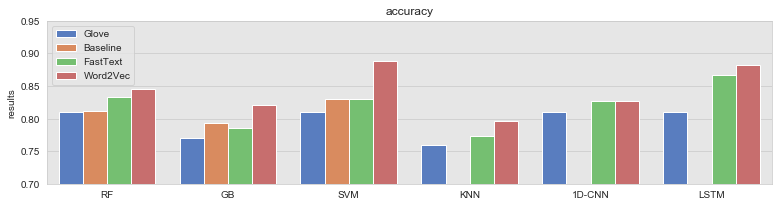

In [146]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 3))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('accuracy')
plt.savefig('results/neural embeddings/all.png')

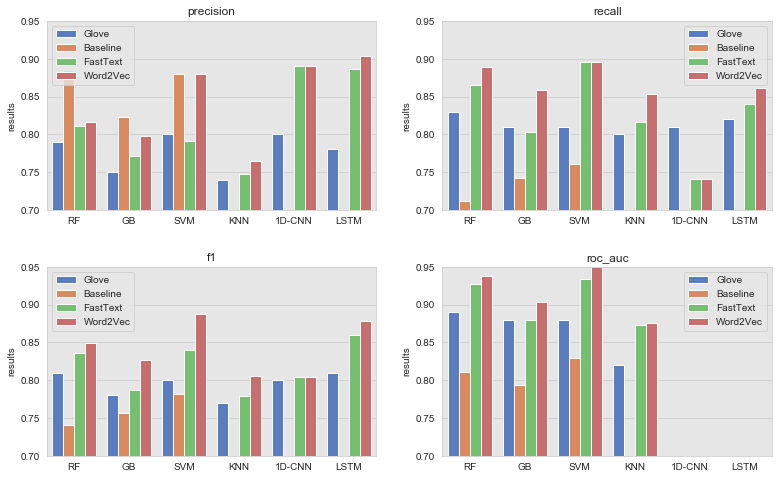

In [147]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(13, 8))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('precision', axs[0,0])
getMetricGraph('recall', axs[0,1])
getMetricGraph('f1', axs[1,0])
getMetricGraph('roc_auc', axs[1,1])
plt.savefig('results/neural embeddings/all.png')

## Combined

In [102]:
baseline = pd.read_csv('results/baseline/test1.csv', index_col=0)
w2v = pd.read_csv('results/neural embeddings/all/w2vfinal1.csv', index_col=0)
combinedChar = pd.read_csv('results/neural embeddings/combined/w2vCSGEmSchiz.csv')
combined = pd.read_csv('results/neural embeddings/combined/w2vWSGEmSchiz.csv', index_col=0)


In [118]:
combined

,accuracy,f1,precision,recall,roc_auc
RandomForest,0.839271,0.838285,0.824101,0.858523,0.933523
GradientBoost,0.775946,0.778494,0.757874,0.803977,0.886210
SVM,0.872610,0.868862,0.877992,0.864962,0.941566
KNN,0.778882,0.790624,0.741938,0.846780,0.871054


In [97]:
def getMetricGraph(column, metric, axs=None):
    
    model = ['Baseline']*4+['Word2Vec']*4 + ['Combined']*4
    idx = list(w2v.index) * 3
    x = pd.DataFrame({'results':metric, 'model':model}, index=idx)
    
    if axs != None:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x, ax=axs)
    else:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x)
        
    ax.set(ylim=(0.4, 0.95))
    ax.legend().set_title('')
    ax.axes.set_title(column, fontsize=12)
    #ax.set_ylabel(column, fontsize=12)

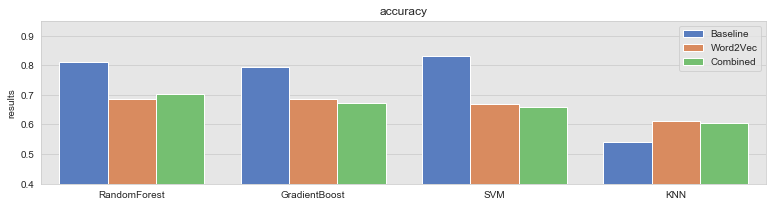

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 3))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('accuracy')
plt.savefig('results/neural embeddings/all/graphs/accCombSum.png')

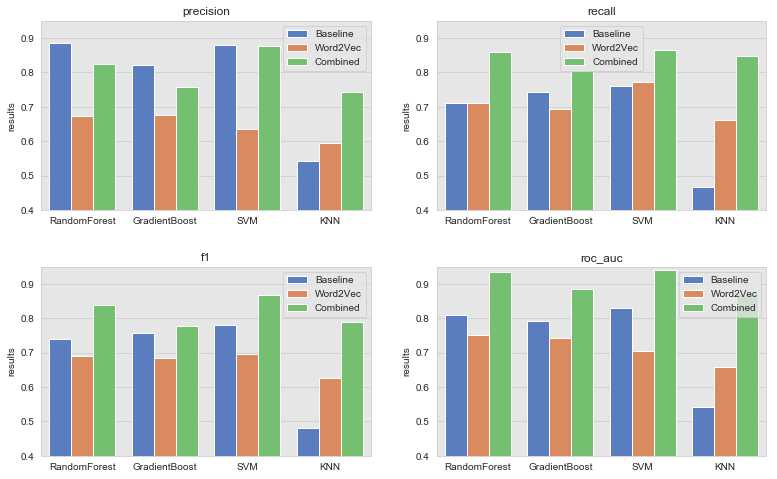

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(13, 8))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('precision', axs[0,0])
getMetricGraph('recall', axs[0,1])
getMetricGraph('f1', axs[1,0])
getMetricGraph('roc_auc', axs[1,1])
plt.savefig('results/neural embeddings/all/graphs/Combined.png')

In [ ]:
###Character

In [103]:
def getMetricGraph(column, axs=None):
    metric = baseline[column].tolist() + w2v[column].tolist() + combined[column].tolist()
    model = ['Baseline']*4+['Word2Vec']*4 + ['Combined']*4
    idx = list(w2v.index) * 3
    x = pd.DataFrame({'results':metric, 'model':model}, index=idx)
    
    if axs != None:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x, ax=axs)
    else:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x)
        
    ax.set(ylim=(0.4, 0.95))
    ax.legend().set_title('')
    ax.axes.set_title(column, fontsize=12)
    #ax.set_ylabel(column, fontsize=12)

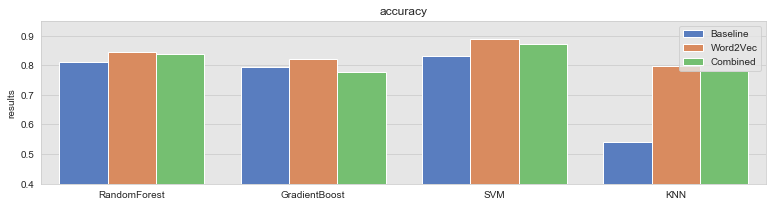

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 3))
plt.subplots_adjust(hspace=0.3)

getMetricGraph('accuracy')
plt.savefig('results/neural embeddings/all/graphs/accCombSum.png')

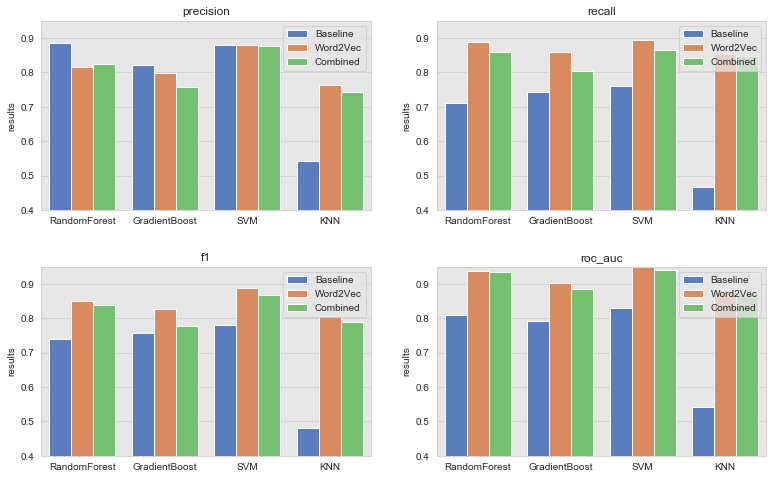

In [107]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(13, 8))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('precision', axs[0,0])
getMetricGraph('recall', axs[0,1])
getMetricGraph('f1', axs[1,0])
getMetricGraph('roc_auc', axs[1,1])
plt.savefig('results/neural embeddings/all/graphs/Combined.png')

## Bert

In [4]:
bert = pd.read_csv('results/bert/bertSum.csv', index_col=0)

In [5]:
def getMetricGraph(column, axs=None):
    metric = glove[column].tolist() + baseline[column].tolist() + ft[column].tolist() + w2v[column].tolist() + bert[column].tolist()
    model = ['Baseline']*5 + ['Glove']*5+['FastText']*5+['Word2Vec']*5 + ['Bert']*5
    idx = list(glove.index) * 5
    x = pd.DataFrame({'results':metric, 'model':model}, index=idx)
    
    if axs != None:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x, ax=axs)
    else:
        ax = sns.barplot(x=x.index, y='results', hue='model', data=x)
        
    ax.set(ylim=(0.7, 0.92))
    ax.legend().set_title('')
    ax.axes.set_title(column, fontsize=12)
    
    ax.legend(loc='center', bbox_to_anchor=(0.85, 0.5), ncol=1)
    #ax.set_ylabel(column, fontsize=12)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 3))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('accuracy')
plt.savefig('results/neural embeddings/all/graphs/accSum.png')

In [110]:
bert = pd.read_csv('results/bert/summary.csv', index_col=0)

In [111]:
bert

,Accuracy,Library
RF,0.85,Word2Vec
GB,0.80,FastText
SVM,0.89,Word2Vec
KNN,0.78,Word2Vec
1D-CNN,0.83,Word2Vec
LSTM,0.88,Word2Vec
Bert,0.89,Bert


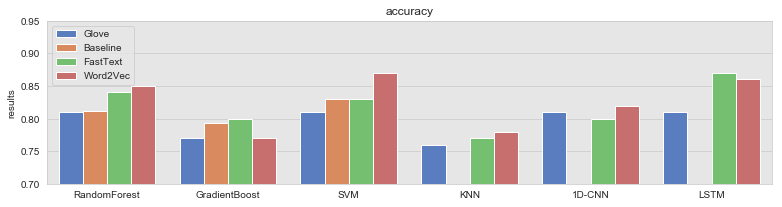

In [167]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 3))
plt.subplots_adjust(hspace=0.3)
getMetricGraph('accuracy')
plt.savefig('results/neural embeddings/all/02 graphs/accSum.png')

In [202]:
colors = {'Word2Vec':'palevioletred','FastText':'lightgreen','Bert':'royalblue'}
bert['color'] = bert['Library'].apply(lambda x: colors[x])


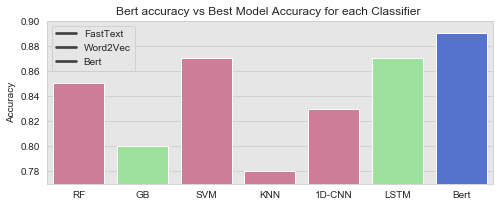

In [210]:
fig, axs = plt.subplots(figsize=(8, 3))
ax = sns.barplot(x=bert.index, y='Accuracy', data=bert, palette=bert['color'])
ax.set(ylim=(0.77, 0.9))
ax.legend().set_title('')
ax.axes.set_title('Bert accuracy vs Best Model Accuracy for each Classifier ', fontsize=12)
ax.legend(loc='upper left', labels=['FastText', 'Word2Vec', 'Bert'])
plt.savefig('results/neural embeddings/all/02 graphs/Bert.png')

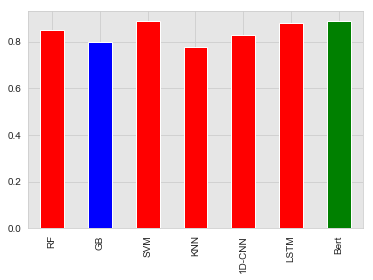

In [117]:
import matplotlib.pyplot as plt
import pandas as pd


colors = {'Word2Vec': 'r', 'FastText': 'b', 'Bert': 'g'}
bert['Accuracy'].plot(kind='bar', color=[colors[i] for i in bert['Library']])

plt.show()

In [177]:
bert

,Accuracy,Library,color
RF,0.85,Word2Vec,red
GB,0.80,FastText,green
SVM,0.87,Word2Vec,red
KNN,0.78,Word2Vec,red
1D-CNN,0.83,Word2Vec,red
LSTM,0.87,FastText,green
Bert,0.89,Bert,purple


In [ ]:
sns.barplot(x='total',y='state',, data=data)

In [15]:
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models.keyedvectors import KeyedVectors

In [118]:
w2vSG = Word2Vec.load('embeddings/Word2Vec/schiz/00 emoticons/all/w2vWSGEmSchiz')

In [197]:
ftSG = Word2Vec.load('embeddings/FastText/schiz/00 emoticons/all/ftWSGEmSchiz')

In [34]:
w2vCB = Word2Vec.load('embeddings/Word2Vec/schiz/00 emoticons/all/w2vWCBEmSchiz')

In [16]:
gloveModels = KeyedVectors.load_word2vec_format('embeddings/glove/glove200', binary=False)

In [21]:
result = gloveModels.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

In [22]:
result

[(u'queen', 0.6820898056030273)]

In [194]:
resultW2vSG = w2vSG.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

In [195]:
resultW2vSG

[(u'\U0001f923\U0001f923\U0001f923', 0.5369794964790344)]

In [198]:
resultft = ftSG.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
resultft

[(u'waking', 0.6963492631912231)]

In [35]:
resultW2vCB = w2vCB.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

In [36]:
resultW2vCB

[(u'\U0001f923\U0001f923\U0001f923', 0.6457946300506592)]

In [42]:
w2vSG.wv.most_similar('schizophrenia')

[(u'depression', 0.47679007053375244),
 (u'bipolar', 0.4730038046836853),
 (u'Bpd', 0.43765944242477417),
 (u'psychosi\u2026', 0.4357019066810608),
 (u'bellletstalkmaternalmentalhealth', 0.42946118116378784),
 (u'reclassified', 0.42680513858795166),
 (u'releva\u2026', 0.42557865381240845),
 (u'Similarly', 0.4254002869129181),
 (u'N\u2026', 0.4226626753807068),
 (u'essentially', 0.42086708545684814)]

In [203]:
resultW2vSG = w2vSG.wv.most_similar(positive=['schizophrenia', 'depression'], negative=['man'], topn=1)
resultW2vSG

[(u'anxiety', 0.5386409759521484)]

In [202]:
resultW2vSG = w2vSG.wv.most_similar(positive=['depression'], negative=['medication'], topn=1)
resultW2vSG

[(u'anxiety', 0.40425342321395874)]

In [71]:
w2vSG.wv.most_similar(positive=['schizophrenia'], negative=['medication'], topn=1)

[(u'bipolar', 0.22215096652507782)]

In [77]:
w2vSG.wv.most_similar(positive=['psychosis'], negative=['medication'], topn=1)

[(u'thought', 0.1490354835987091)]

In [79]:
w2vSG.wv.most_similar(positive=['medication'], negative=['crazy'], topn=1)

[(u'29-', 0.34023773670196533)]

In [69]:
w2vSG.wv.most_similar(positive=['bipolar', 'medication'], topn=1)

[(u'wit\u2026', 0.7232993841171265)]

In [87]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
freq = w2vSG.wv.index2entity[:30]
freq

[u'@',
 u':',
 u'.',
 u',',
 u'RT',
 u'#',
 u'http',
 u'psychotic',
 u'I',
 u'\u2019',
 u'!',
 u"'s",
 u'?',
 u'schizophrenia',
 u'psychosis',
 u')',
 u'(',
 u'``',
 u'&',
 u'The',
 u"n't",
 u"''",
 u'like',
 u'disorder',
 u'...',
 u'people',
 u'wa',
 u'ha',
 u'schizophrenic',
 u'one']

In [141]:
w2vSG.wv.vocab.items()


[(u'Ottomans', <gensim.models.keyedvectors.Vocab at 0x1a651ee550>),
 (u'//t.co/EdwIkj5CpP', <gensim.models.keyedvectors.Vocab at 0x1a651ee4d0>),
 (u'healthymindiph', <gensim.models.keyedvectors.Vocab at 0x1a651ee6d0>),
 (u'four', <gensim.models.keyedvectors.Vocab at 0x1a651ee350>),
 (u'//t.co/dgVVOcIfAf', <gensim.models.keyedvectors.Vocab at 0x1a8eefdc10>),
 (u'Does', <gensim.models.keyedvectors.Vocab at 0x1a651eef50>),
 (u'farrah4america', <gensim.models.keyedvectors.Vocab at 0x1a651ee890>),
 (u'Hopefully', <gensim.models.keyedvectors.Vocab at 0x1a8ee1ebd0>),
 (u'Until', <gensim.models.keyedvectors.Vocab at 0x1a651ee910>),
 (u'looking', <gensim.models.keyedvectors.Vocab at 0x1a7d9ea050>),
 (u'electricity', <gensim.models.keyedvectors.Vocab at 0x1a651eeed0>),
 (u'TOBINATION', <gensim.models.keyedvectors.Vocab at 0x1a651eed10>),
 (u'wholeheartedly', <gensim.models.keyedvectors.Vocab at 0x1a7d9ea090>),
 (u'Western', <gensim.models.keyedvectors.Vocab at 0x1a651eee10>),
 (u'Cases', <gensim

In [131]:
import nltk
import string

In [132]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gregoryverghese/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
punctuation = list(string.punctuation)

In [139]:
words = [w for w in words if w not in punctuation and w!='RT']
words

[u'pyschopath/sociopath',
 u'julia_marie1121',
 u'hating',
 u'stevefucks',
 u'Hmu',
 u'trapped',
 u'go\u2026',
 u'shankellly',
 u'burds',
 u'tf',
 u'anytime',
 u'Charluv',
 u'distinction',
 u'suspended',
 u'Umm',
 u'.do',
 u'\u0e01\u0e31\u0e1a',
 u'Pure',
 u'boy',
 u'psychometric',
 u'lane',
 u'//t.co/93Wa7uDHKM',
 u'yo',
 u'\U0001f643',
 u'oriented',
 u'Kenyans',
 u'noisy',
 u'thakelas',
 u'http_hentai',
 u'scholar']

In [183]:
keys = ['disorder', 'psychotic', 'schizophrenia', 'psychological',  'anxiety','depression', 'bipolar', 'psychosis', 'medication']


In [184]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2vSG.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2vSG[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/Users/gregoryverghese/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/Users/gregoryverghese/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [190]:
tsne_model_en_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

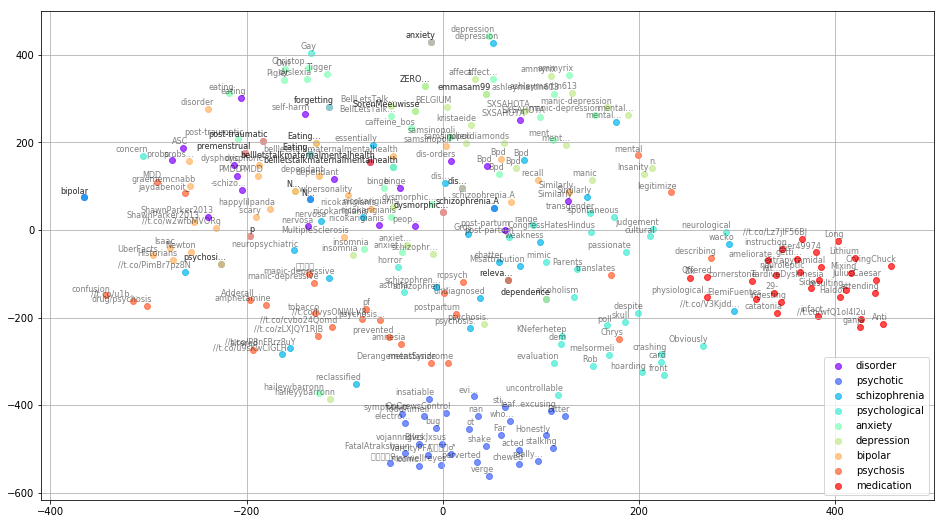

In [191]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
% matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("results/tsne.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

In [192]:
w2vSG

### Embedding Size

In [18]:
def getEmbeddingSize(filePath):
    
    x = pd.DataFrame()
    
    for i in range(40):
        results = pd.read_csv(filePath+str(i)+'.csv', index_col=0)
        acurracy = pd.DataFrame(results.T.loc['accuracy']).T
        x = pd.concat([x,acurracy], axis=0)
                              
    return x

In [22]:
w2vSize = getEmbeddingSize('results/neural embeddings/size/w2v/w2vWSGEmSchiz')
ftSize = getEmbeddingSize('results/neural embeddings/size/ft/ftWSGEmSchiz')

In [31]:
w2vSize = w2vSize.rename(columns={"RandomForest": "w2vRF", 'GradientBoost':"w2vGB", "SVM":'w2vSVM', 'KNN': 'w2vKNN'})
ftSize = ftSize.rename(columns={"RandomForest": "ftRF", 'GradientBoost':"ftGB", "SVM":'ftSVM', 'KNN': 'ftKNN'})

In [32]:
total = pd.concat([w2vSize, ftSize], axis=1)

In [48]:
w2vRf = w2vSize['w2vRF']
ftRf = ftSize['ftRF']
hue = ['w2v']*len(w2vRf) + ['ft']*len(ftRf)
idx = list(no.index)*2

In [62]:
x = w2vRf+ftRf
x = pd.DataFrame(x)
hue = pd.DataFrame(hue)


In [ ]:
pd.concat([x, hue],axis=1)

In [ ]:
pd.concat([x, hue],axis=1)

In [ ]:
pd.DataFrame({'Results':x, 'hue':hue})

In [33]:
ax = sns.lineplot(x="w2vRF", y="signal", hue="event", style="event", data=fmri)

,w2vRF,w2vGB,w2vSVM,w2vKNN,ftRF,ftGB,ftSVM,ftKNN
accuracy,0.617926,0.645574,0.530262,0.587849,0.618439,0.573248,0.554513,0.569343
accuracy,0.620820,0.636482,0.478600,0.527185,0.633221,0.588493,0.521126,0.567051
accuracy,0.626697,0.645713,0.505741,0.547850,0.651779,0.648928,0.578710,0.563102
accuracy,0.684517,0.690804,0.508868,0.542482,0.570128,0.573248,0.524114,0.533664
accuracy,0.639097,0.645480,0.484524,0.572274,0.603416,0.585142,0.499819,0.581927
accuracy,0.708716,0.684471,0.499816,0.617329,0.675884,0.615493,0.590739,0.636300
accuracy,0.709085,0.684839,0.520989,0.627158,0.669819,0.673354,0.599973,0.663390
accuracy,0.703157,0.691448,0.618067,0.624311,0.721299,0.681534,0.630329,0.660268
accuracy,0.721483,0.733514,0.618159,0.618114,0.745365,0.754456,0.681668,0.672484
accuracy,0.678314,0.684653,0.657558,0.642085,0.772411,0.715190,0.724191,0.702611


,RandomForest,GradientBoost,SVM,KNN
accuracy,0.618439,0.573248,0.554513,0.569343
accuracy,0.633221,0.588493,0.521126,0.567051
accuracy,0.651779,0.648928,0.578710,0.563102
accuracy,0.570128,0.573248,0.524114,0.533664
accuracy,0.603416,0.585142,0.499819,0.581927
accuracy,0.675884,0.615493,0.590739,0.636300
accuracy,0.669819,0.673354,0.599973,0.663390
accuracy,0.721299,0.681534,0.630329,0.660268
accuracy,0.745365,0.754456,0.681668,0.672484
accuracy,0.772411,0.715190,0.724191,0.702611
